<a href="https://colab.research.google.com/github/Speckky/Number_Recognition_on_Mnist/blob/main/Number_Recognition_on_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES.

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



FETCHING FROM DATASET.

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:

x, y = mnist['data'], mnist['target']

In [4]:

some_digit = x.to_numpy()[36002]
some_digit_image = some_digit.reshape(28, 28)

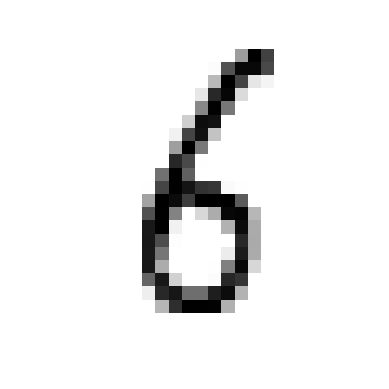

In [5]:

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

In [6]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]


In [7]:

shuffle_index = np.random.permutation(60000)
x_train, y_train= x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

BUILDING 2-DETECTOR.

In [8]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 6)
y_test_2 = (y_test == 6)

TRAINING A LOGISTIC REGRESSION CLASSIFIER.

In [9]:

clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)

[ True]


CROSS VALIDATION.

In [10]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())


0.9843166666666666


THE END.